In [1]:
import keras
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [128]:
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    assert len(image.shape)==3

    if random_state is None:
        random_state = np.random.RandomState(None)
    r=image[:,:,0]
    g=image[...,1]
    b=image[...,2]
    
    shape = r.shape

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))
    res = np.copy(image)
    res[...,0] = map_coordinates(r, indices, order=1).reshape(shape)
    res[...,1] = map_coordinates(g, indices, order=1).reshape(shape)
    res[...,2] = map_coordinates(b, indices, order=1).reshape(shape)
    
    return res 

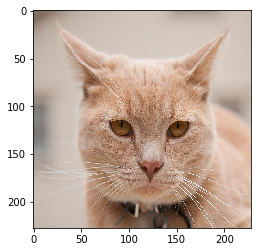

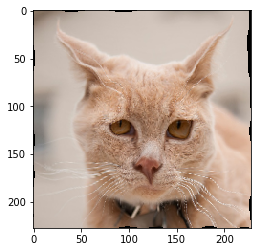

In [163]:
from  skimage import io
img =  keras.preprocessing.image.load_img("src_cats_faceOnly/0.jpg",target_size=(228,228))
img = keras.preprocessing.image.img_to_array(img)/255
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)
plt.figure()
t=100
a,sigma=100,8
img = elastic_transform(img,t,sigma)

plt.imshow(img)
keras.preprocessing.image.save_img("res_cats/1.jpg", img)

In [78]:
u =np.concatenate( ([0],[1],[2]) )

In [80]:
u
u.reshape( (1,1,3))

array([[[0, 1, 2]]])